#  **Diabetes Prediction**

# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# **Load and Explore data**

In [ ]:
df= pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.shape

(768, 9)

There are 9 columns in the dataset and 768 entries. From the table we can say that no value is missing in any column.

# **Data Analysis from the column**

**Univariate Analysis**

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

There are 268 patients who have diabetes and 500 patients so no have.

Now we have to compare with other column like BloodPressure, Age, BMI etc for a better prediction.

In [ ]:
df['BMI'].value_counts()

32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: BMI, Length: 248, dtype: int64

<Axes: ylabel='Frequency'>

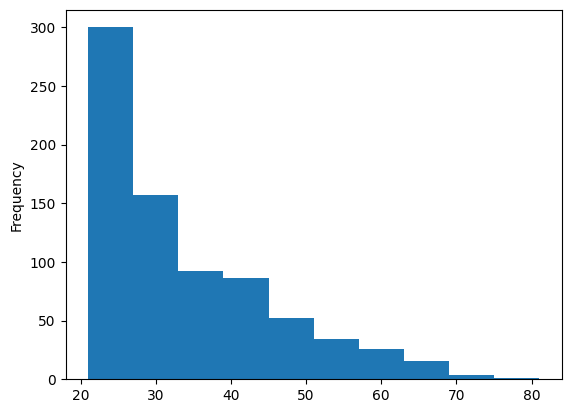

In [ ]:
df['Age'].plot(kind='hist')

**Bivariate Analysis**

<Axes: xlabel='BMI', ylabel='Outcome'>

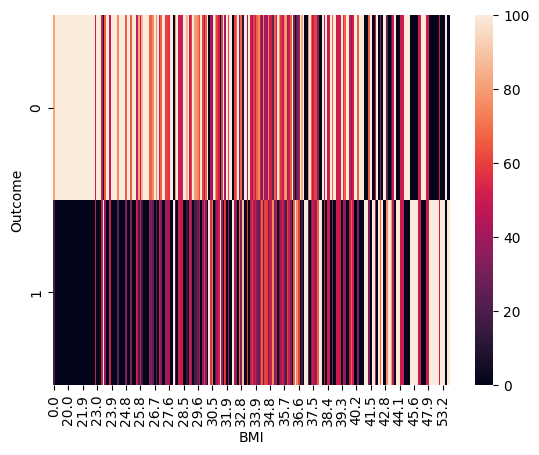

In [ ]:
sns.heatmap(pd.crosstab(df['Outcome'],df['BMI'],normalize='columns')*100)

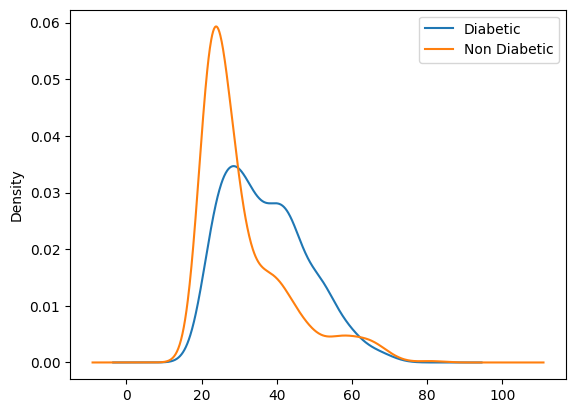

In [ ]:
df[df['Outcome'] == 1]['Age'].plot(kind='kde',label='Diabetic')
df[df['Outcome'] == 0]['Age'].plot(kind='kde',label='Non Diabetic')

plt.legend()
plt.show()

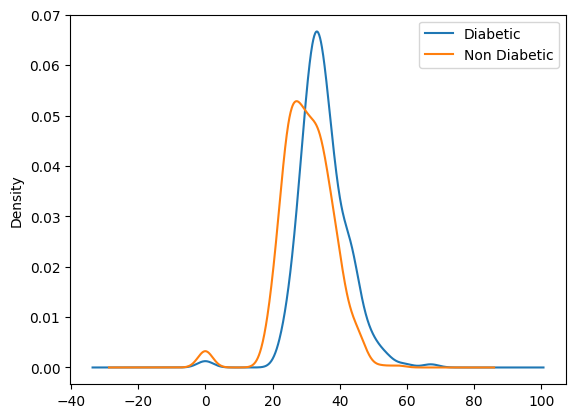

In [ ]:
df[df['Outcome'] == 1]['BMI'].plot(kind='kde',label='Diabetic')
df[df['Outcome'] == 0]['BMI'].plot(kind='kde',label='Non Diabetic')

plt.legend()
plt.show()

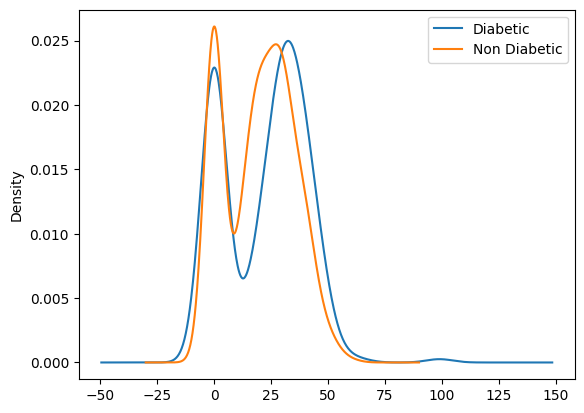

In [ ]:
df[df['Outcome'] == 1]['SkinThickness'].plot(kind='kde',label='Diabetic')
df[df['Outcome'] == 0]['SkinThickness'].plot(kind='kde',label='Non Diabetic')

plt.legend()
plt.show()

In [ ]:
# separating the data and labels
X = df.drop(columns = 'Outcome', axis=1)
Y = df['Outcome']

**Data Standardization**

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
df1 = scaler.transform(X)

In [ ]:
X = df1
Y = df['Outcome']

Train Test Split on the dataset

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
print(X_train.shape, X_test.shape)

(614, 8) (154, 8)


Training the model with Support Vector Classifier Machine

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

In [ ]:
# accuracy score on the training data
x_train_pred = classifier.predict(X_train)
train_accuracy = accuracy_score(x_train_pred, Y_train)
print('Accuracy score of the training data : ',train_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [ ]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_accuracy)

Accuracy score of the test data :  0.7727272727272727


# **Making the prediction**

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
